# MERTON CREDIT MODEL

Check the method for generating correlation Gaussian random numbers

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from financepy.models.merton_firm import *
from financepy.models.merton_firm_mkt import *

## Merton Credit Model Market

This is a version of the Merton Credit Model that takes as input the equity value and volatility.

Agrees with results at https://fr.mathworks.com/help/risk/mertonmodel.html

In [18]:
equity_value = [2.6406, 2.6817, 3.977, 2.947, 2.528]
equity_vol = [0.7103, 0.3929, 0.3121, 0.4595, 0.6181]
bond_face = [4.0, 3.5, 3.5, 3.2, 4.0]
risk_free_rate = [0.05, 0.05, 0.05, 0.05, 0.05]
asset_growth_rate = [0.0306, 0.03, 0.031, 0.0302, 0.0305]
years_to_maturity = 1.0 #np.linspace(0.1, 10, 100)

In [19]:
model = MertonFirmMkt(equity_value, bond_face, years_to_maturity, risk_free_rate, asset_growth_rate, equity_vol)

In [20]:
model

OBJECT TYPE: MertonFirmMkt
EQUITY VALUE: [2.6406 2.6817 3.977  2.947  2.528 ]
BOND FACE: [4.  3.5 3.5 3.2 4. ]
YEARS TO MATURITY: [1.]
ASSET GROWTH: [0.0306 0.03   0.031  0.0302 0.0305]
EQUITY VOLATILITY: [0.7103 0.3929 0.3121 0.4595 0.6181]

In [21]:
model.credit_spread()

array([6.46904086e-03, 2.28614886e-05, 9.25718983e-08, 1.23913256e-04,
       2.57205669e-03])

In [22]:
model.leverage()

array([1.60524574, 1.71740768, 2.08751505, 1.87204906, 1.58078595])

In [23]:
model

OBJECT TYPE: MertonFirmMkt
EQUITY VALUE: [2.6406 2.6817 3.977  2.947  2.528 ]
BOND FACE: [4.  3.5 3.5 3.2 4. ]
YEARS TO MATURITY: [1.]
ASSET GROWTH: [0.0306 0.03   0.031  0.0302 0.0305]
EQUITY VOLATILITY: [0.7103 0.3929 0.3121 0.4595 0.6181]

In [24]:
model.prob_default()

array([6.37907793e-02, 7.67784588e-04, 4.72098856e-06, 2.62232942e-03,
       3.44082121e-02])

In [25]:
model.debt_value()

array([3.78038297, 3.32922687, 3.32930268, 3.043557  , 3.79514381])

In [26]:
model.dist_default()

array([1.52370861, 3.16790101, 4.42975544, 2.79161697, 1.81962233])

## Merton's Basic Model - Credit Spread Term Structure

In [27]:
assetVol = 0.20
bond_face = 100.0
risk_free_rate = 0.05
asset_growth_rate = 0.05
years_to_maturity = np.linspace(0.01,10.,1000)

In [28]:
model1 = MertonFirm(140.0, bond_face, years_to_maturity, risk_free_rate, asset_growth_rate, assetVol)
model2 = MertonFirm(115.0, bond_face, years_to_maturity, risk_free_rate, asset_growth_rate, assetVol)
model3 = MertonFirm(105.0, bond_face, years_to_maturity, risk_free_rate, asset_growth_rate, assetVol)

In [29]:
spd1 = model1.credit_spread() * 10000
spd2 = model2.credit_spread() * 10000
spd3 = model3.credit_spread() * 10000

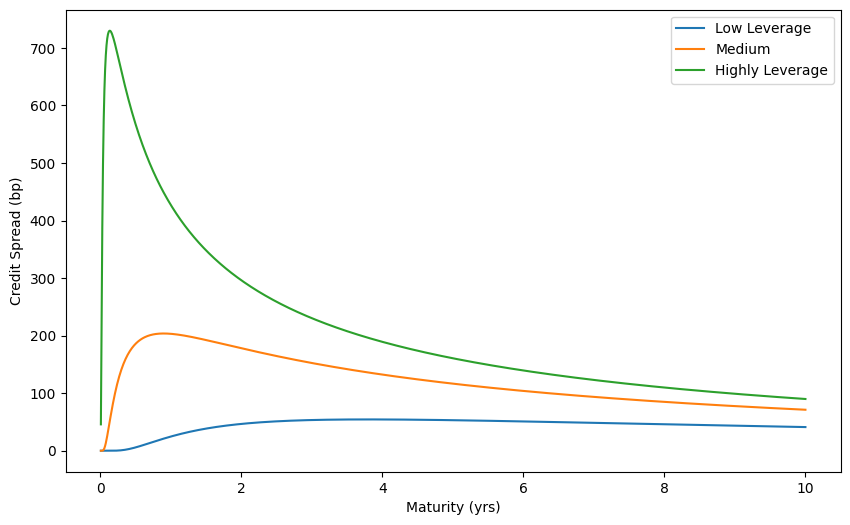

In [30]:
plt.figure(figsize=(10,6))
plt.plot(years_to_maturity, spd1, label="Low Leverage")
plt.plot(years_to_maturity, spd2, label="Medium")
plt.plot(years_to_maturity, spd3, label="Highly Leverage")
plt.xlabel("Maturity (yrs)")
plt.ylabel("Credit Spread (bp)")
plt.legend();

Copyright (c) 2020 Dominic O'Kane